# Experiments
## Databases

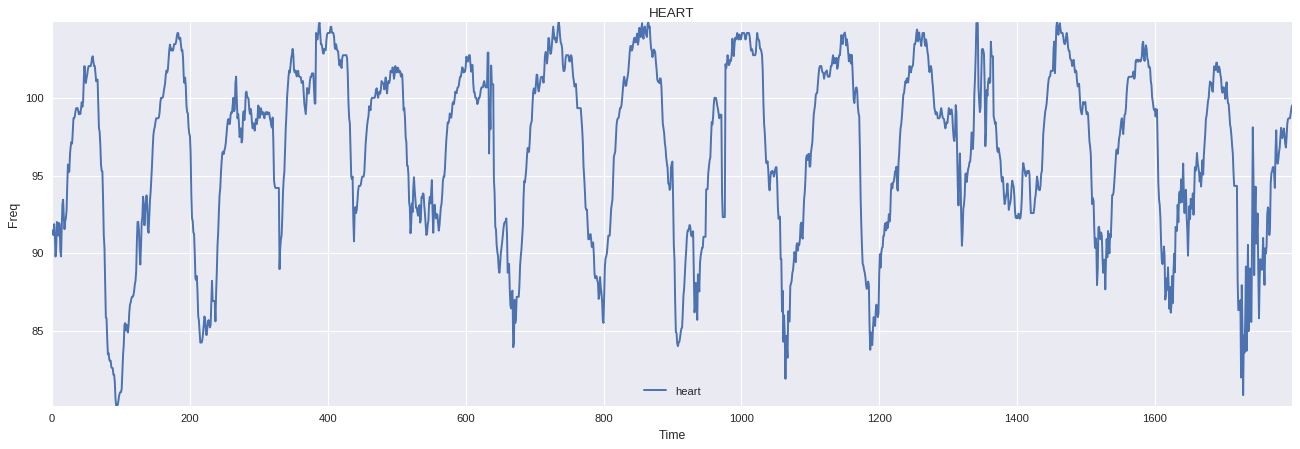

In [1]:
%reload_ext autoreload
%reload_ext line_profiler
%autoreload 2
%matplotlib inline
import g3py as g3

g3.style_seaborn()

x, y = g3.data_heart()
g3.plot(x,y,label='heart')
g3.plot_text('HEART','Time','Freq')

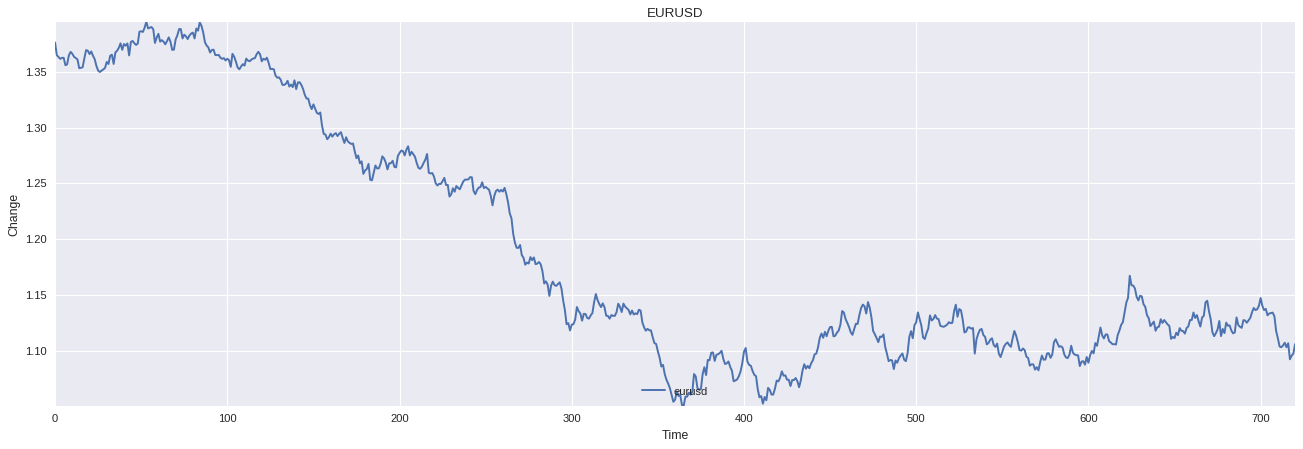

In [2]:
x, y = g3.data_eurusd()
g3.plot(x,y,label='eurusd')
g3.plot_text('EURUSD','Time','Change')

mldata.org dataset: mauna-loa-atmospheric-co2


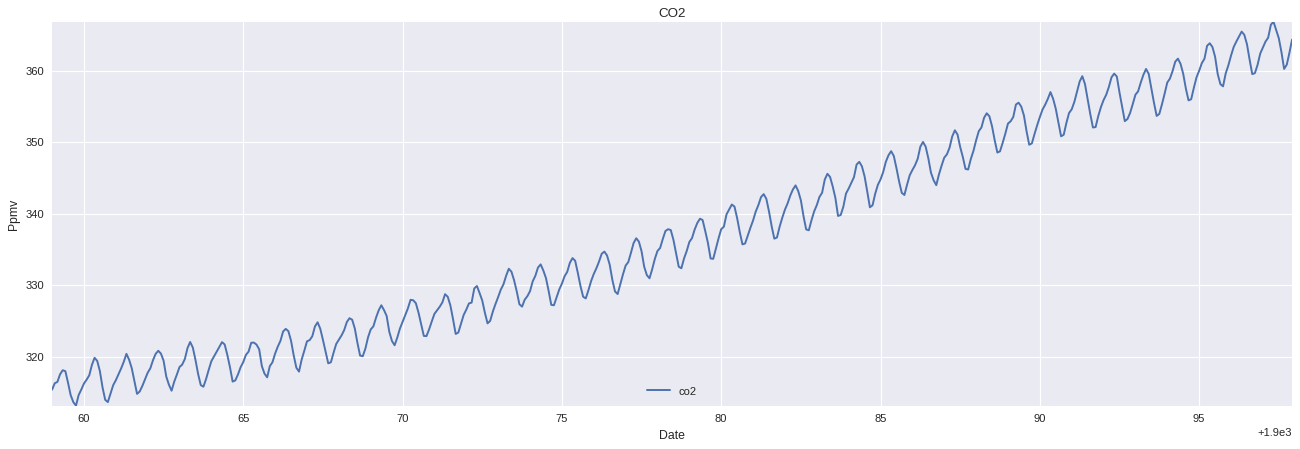

In [3]:
x, y = g3.data_co2()
g3.plot(x,y,label='co2')
g3.plot_text('CO2','Date','Ppmv')

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



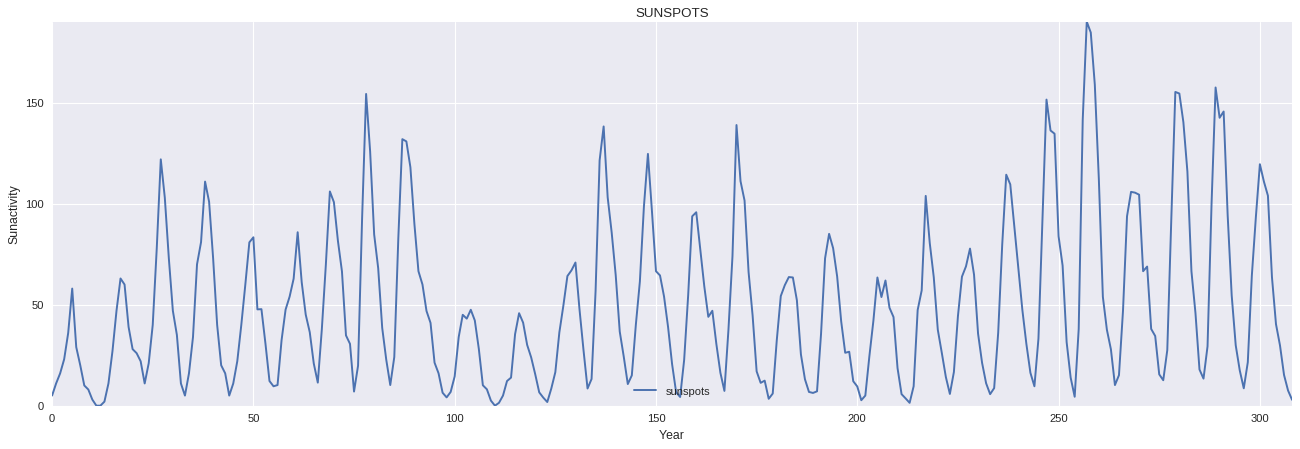

In [4]:
x, y = g3.data_sunspots()
g3.plot(x,y,label='sunspots')
g3.plot_text('SUNSPOTS','Year','Sunactivity')

::

    Number of observations: 235
    Number of variables: 2
    Variable name definitions:
        income - annual household income (Belgian francs)
        foodexp - annual household food expenditure (Belgian francs)



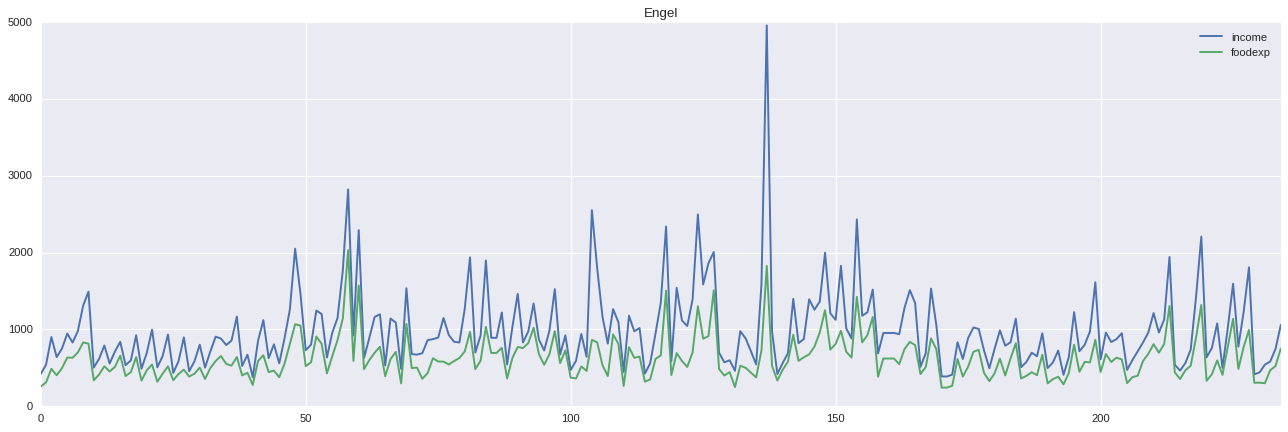

In [5]:
engel = g3.data_engel()
_ = engel.plot(title='Engel')

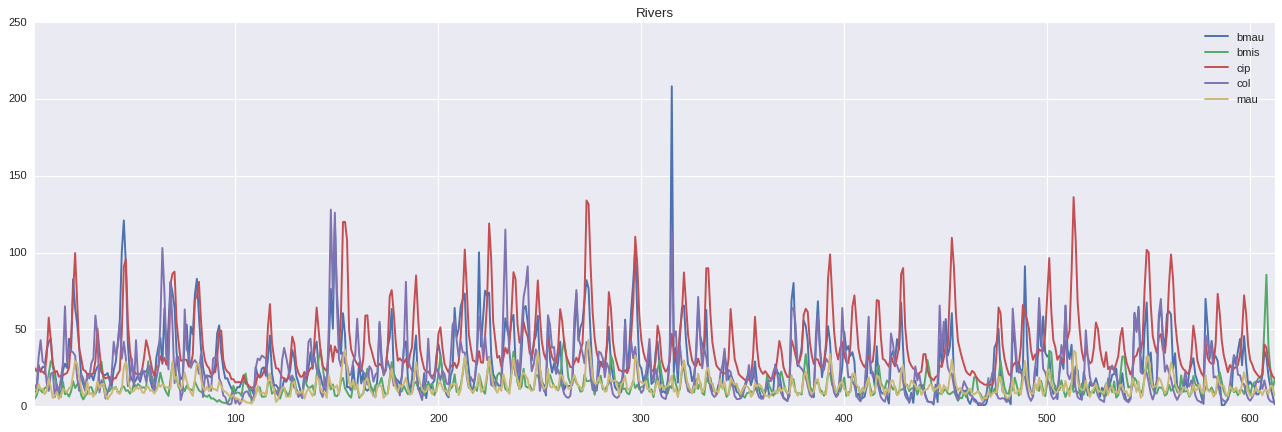

In [6]:
rivers = g3.data_rivers()
_ = rivers.plot(title='Rivers')

In [7]:
abalone = g3.data_abalone()
abalone = abalone/(abalone.max()-abalone.min())
_ = abalone.plot(title='Abalone')

abalone


AttributeError: 'tuple' object has no attribute 'max'

In [ ]:
creep = g3.data_creep()
creep = creep/(creep.max()-creep.min())
_ = creep.plot(title='Creep')

In [ ]:
ailerons = g3.data_ailerons()
ailerons = ailerons/(ailerons.max()-ailerons.min())
_ = ailerons.plot(title='Ailerons')

## Test Data

Total: 309 | Obs: 39 (12.62135922330097%)
Total: 309 | Obs: 77 (24.919093851132686%)


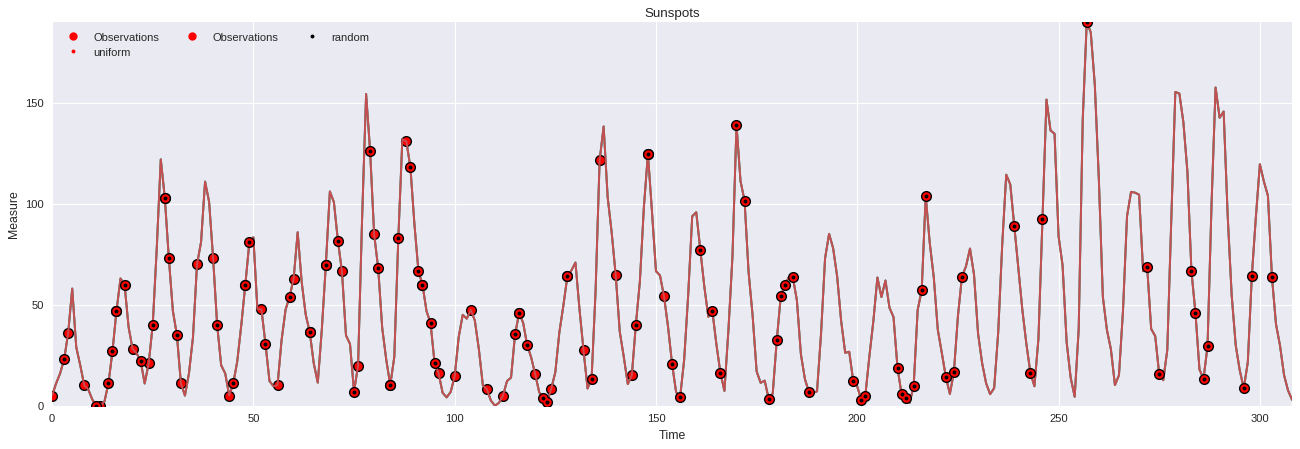

In [7]:
p_obs = 0.25
l_obs = 0.5

g3.plot(x, y)


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.uniform_obs(x, y, p_obs, l_obs)
g3.plot(x_obs, y_obs,'.r', label = 'uniform')


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, p_obs, include_min=True)
g3.plot(x_obs, y_obs,'.k', label = 'random')

g3.plot_text('Sunspots', 'Time', 'Measure', loc=2)

## Simulation

In [8]:
gp = g3.GP(x_obs, g3.Bias(), g3.SE(x_obs), name='GP', file='models/05-GP.g3')
models = [gp]
ex = g3.Experiment(models, file='experiments/sunsets.g3x')
ex.data(x, y, p_obs, method='random', include_min=True)
ex.scores(logpred=True, mean=True, variance=True)
ex.model_selection(find_MAP=True, points=5, powell=False, master=gp)
ex.describe()

'Loaded model models/05-GP.g3'


{'data_limit': 1.0,
 'data_method': <function g3py.libs.data.random_obs>,
 'data_min': True,
 'data_p': 0.25,
 'data_x': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
    

In [9]:
ex.simulations()

obs valid  \
1  [10, 11, 14, 19, 20, 23, 34, 35, 38, 40, 46, 4...  None   

                                                test  \
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16,...   

                     datetime  
1  2017-09-17 01:52:23.947480

In [11]:
ex.run(n_simulations=0, repeat=[1])
ex.save()

  0%|          | 0/1 [00:00<?, ?it/s]

Simulations: n= 0  repeat= [1]


************************************************************
************************************************************
Repetition #1
************************************************************


**************************************************
GP #1
**************************************************
'Starting function value (-logp): 78574.5'
'start1_bfgs'


         Current function value: 371.044250
         Iterations: 34
         Function evaluations: 114
         Gradient evaluations: 102
'start2_bfgs'
         Current function value: 396.780426
         Iterations: 14
         Function evaluations: 98
         Gradient evaluations: 86
'start3_bfgs'
         Current function value: 371.043762
         Iterations: 39
         Function evaluations: 116
         Gradient evaluations: 104
'start4_bfgs'
         Current function value: 371.044067
         Iterations: 26
         Function evaluations: 102
         Gradient evaluations: 90
'start5_bfgs'
         Current function value: 371.052032
         Iterations: 34
         Function evaluations: 136
         Gradient evaluations: 118
{'GP_Bias_Bias': array(48.94150161743164, dtype=float32),
 'GP_Noise_var_log_': array(-8.391374588012695, dtype=float32),
 'GP_SE_rate_log_': array([-0.87456489], dtype=float32),
 'GP_SE_var_log_': array(7.667347431182861, dtype=float32)}



100%|██████████| 1/1 [00:03<00:00,  3.64s/it]


In [12]:
ex.simulations()

obs valid  \
1  [10, 11, 14, 19, 20, 23, 34, 35, 38, 40, 46, 4...  None   

                                                test  \
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 16,...   

                     datetime  
1  2017-09-17 01:52:23.947480

In [13]:
ex.results()

n_sim model  selected  time_params  time_obs    time_valid  time_test  \
0     1    GP  find_MAP     0.912610  0.022568  7.152557e-07   0.066523   
1     1    GP  find_MAP     1.072850  2.031781  7.152557e-07   0.075462   
2     1    GP  find_MAP     1.003545  2.554013  4.768372e-07   0.071922   

                     datetime    obs_l1        obs_l2   obs_mse  obs_nlpd  \
0  2017-09-17 02:06:44.585798  0.000020  8.589901e-10  0.000501 -2.895915   
1  2017-09-17 02:11:26.021063  0.000011  2.130363e-10  0.000250 -2.904918   
2  2017-09-17 02:49:25.490106  0.000010  2.230147e-10  0.000244 -2.910184   

   obs_rmse                                             params  \
0  0.022382  {'GP_SE_var_log_': 7.6671671867370605, 'GP_Noi...   
1  0.015827  {'GP_SE_var_log_': 7.667211532592773, 'GP_Nois...   
2  0.015625  {'GP_SE_var_log_': 7.667347431182861, 'GP_Nois...   

                                               start    test_l1     test_l2  \
0  [{'GP_SE_var_log_': 0.0, 'GP_Noise_var_log_': ...  18.797157  675.603888   
1  [{'GP_SE_var_log_': 0.0, 'GP_Noise_var_log_': ...  18.797112  675.598900   
2  [{'GP_SE_var_log_': 0.0, 'GP_Noise_var_log_': ...  18.797637  675.654883   

      test_mse  test_nlpd  test_rmse  
0  1409.626480   5.171822  37.544993  
1  1409.662658   5.171736  37.545475  
2  1409.697403   5.172357  37.545937

In [14]:
ex.drop_duplicates()

In [15]:
ex.results()

n_sim model  selected  time_params  time_obs    time_valid  time_test  \
0     1    GP  find_MAP     1.003545  2.554013  4.768372e-07   0.071922   

                     datetime   obs_l1        obs_l2   obs_mse  obs_nlpd  \
0  2017-09-17 02:49:25.490106  0.00001  2.230147e-10  0.000244 -2.910184   

   obs_rmse                                             params  \
0  0.015625  {'GP_SE_var_log_': 7.667347431182861, 'GP_Nois...   

                                               start    test_l1     test_l2  \
0  [{'GP_SE_var_log_': 0.0, 'GP_Noise_var_log_': ...  18.797637  675.654883   

      test_mse  test_nlpd  test_rmse  
0  1409.697403   5.172357  37.545937

In [16]:
gp = g3.GP(x_obs, g3.Bias(), g3.SE(x_obs), name='GP', file='models/05-GP.g3')

wgp1 = g3.WGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.WarpingTanh(y_obs, 1), 
              name='WGP1', file='models/05-WGP1.g3')
wgp2 = g3.WGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.WarpingTanh(y_obs, 2), 
              name='WGP2', file='models/05-WGP2.g3')
wgp3 = g3.WGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.WarpingTanh(y_obs, 3), 
              name='WGP3', file='models/05-WGP3.g3')

tgp1 = g3.WGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.BoxCoxLinear(y_obs), 
              name='TGP1', file='models/05-TGP1.g3')
tgp2 = g3.WGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.ArcsinhLinear(y_obs), 
              name='TGP2', file='models/05-TGP2.g3')
tgp3 = g3.WGP(x_obs, g3.Bias(), g3.SE(x_obs), g3.BoxCoxLinear(y_obs) \
              @ g3.ArcsinhLinear(y_obs), name='TGP3', file='models/05-TGP3.g3')

'Loaded model models/05-GP.g3'
'Loaded model models/05-WGP1.g3'
'Loaded model models/05-WGP2.g3'
'Loaded model models/05-WGP3.g3'
'Loaded model models/05-TGP1.g3'
'Loaded model models/05-TGP2.g3'
'Loaded model models/05-TGP3.g3'


In [59]:
models = [gp, tgp3]
ex = g3.Experiment(models, file='experiments/sunsets.g3x')
ex.data(x, y, p_obs, method='random', include_min=True)
ex.scores(logpred=True, mean=True, variance=True)
ex.model_selection(find_MAP=True, points=5, powell=False, master=gp)
ex.describe()

{'data_limit': 1.0,
 'data_method': <function g3py.libs.data.random_obs>,
 'data_min': True,
 'data_p': 0.25,
 'data_x': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
    

In [60]:
ex.run(n_simulations=0, repeat=[0])
ex.save()

  0%|          | 0/2 [00:00<?, ?it/s]

Simulations: n= 0  repeat= [0]


************************************************************
************************************************************
Repetition #0
************************************************************


**************************************************
GP #0
**************************************************
'Starting function value (-logp): 65968.4'
'start1_bfgs'


         Current function value: 378.937042
         Iterations: 23
         Function evaluations: 115
         Gradient evaluations: 102
'start2_bfgs'
         Current function value: 386.191162
         Iterations: 14
         Function evaluations: 79
         Gradient evaluations: 67
'start3_bfgs'
         Current function value: 378.937073
         Iterations: 19
         Function evaluations: 109
         Gradient evaluations: 96
'start4_bfgs'
         Current function value: 386.191162
         Iterations: 14
         Function evaluations: 91
         Gradient evaluations: 79
'start5_bfgs'



 50%|█████     | 1/2 [00:00<00:00,  1.08it/s]

         Current function value: 378.937042
         Iterations: 22
         Function evaluations: 106
         Gradient evaluations: 94
{'GP_Bias_Bias': array(51.7247428894043, dtype=float32),
 'GP_Noise_var_log_': array(-8.956637382507324, dtype=float32),
 'GP_SE_rate_log_': array([-0.29488948], dtype=float32),
 'GP_SE_var_log_': array(7.312847137451172, dtype=float32)}


**************************************************
TGP3 #0
**************************************************


'Starting function value (-logp): 362.502'
'start1_bfgs'
         Current function value: 362.501617
         Iterations: 6
         Function evaluations: 125
         Gradient evaluations: 113
'start2_bfgs'
         Current function value: 362.501617
         Iterations: 6
         Function evaluations: 125
         Gradient evaluations: 113
'start3_bfgs'
Optimization terminated successfully.
         Current function value: 1000000015047466219876688855040.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
'start4_bfgs'
         Current function value: 376.229340
         Iterations: 15
         Function evaluations: 83
         Gradient evaluations: 77
'start5_bfgs'



100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

         Current function value: 364.362579
         Iterations: 11
         Function evaluations: 75
         Gradient evaluations: 67
{'TGP3_ArcsinhLinear_scale_log_': array(-1.4848805665969849, dtype=float32),
 'TGP3_ArcsinhLinear_shift': array(-0.7609664797782898, dtype=float32),
 'TGP3_Bias_Bias': array(0.6451326608657837, dtype=float32),
 'TGP3_BoxCoxLinear_power_log_': array(-1.0893841981887817, dtype=float32),
 'TGP3_BoxCoxLinear_scale_log_': array(9.19312572479248, dtype=float32),
 'TGP3_BoxCoxLinear_shift': array(12.854231834411621, dtype=float32),
 'TGP3_Noise_var_log_': array(-11.10529899597168, dtype=float32),
 'TGP3_SE_rate_log_': array([-0.45852357], dtype=float32),
 'TGP3_SE_var_log_': array(-6.088994979858398, dtype=float32)}


PicklingError: Can't pickle <class 'g3py.bayesian.selection.Experiment'>: it's not the same object as g3py.bayesian.selection.Experiment

In [ ]:
ex.results()

In [ ]:
ex.results(model='GP').describe().T

In [ ]:
ex.results(model=['WGP1','WGP2','WGP3']).describe().T

In [ ]:
ex.results(model=['TGP1','TGP2','TGP3']).describe().T

# Gaussian Random Fields

Starting function value (-logp): 308.137

start_bfgs
         Current function value: 292.340698
         Iterations: 30
         Function evaluations: 115
         Gradient evaluations: 103

start_powell
Optimization terminated successfully.
         Current function value: 292.443054
         Iterations: 4
         Function evaluations: 612

start_bfgs_powell
Optimization terminated successfully.
         Current function value: 292.340637
         Iterations: 1
         Function evaluations: 275

start_powell_bfgs
         Current function value: 292.340698
         Iterations: 23
         Function evaluations: 101
         Gradient evaluations: 89
{'GP_Noise_var_log_': array(1.4650300741195679, dtype=float32), 'GP_Bias_Bias': array(10.573676109313965, dtype=float32), 'GP_SE_var_log_': array(3.3363003730773926, dtype=float32), 'GP_SE_rate_log_': array([-10.2295351 ,  -3.92238235,   1.38733137,  -9.09148407,
         0.71042562,   1.04469121,   2.17116308,  -6.17700958], dtype=float3

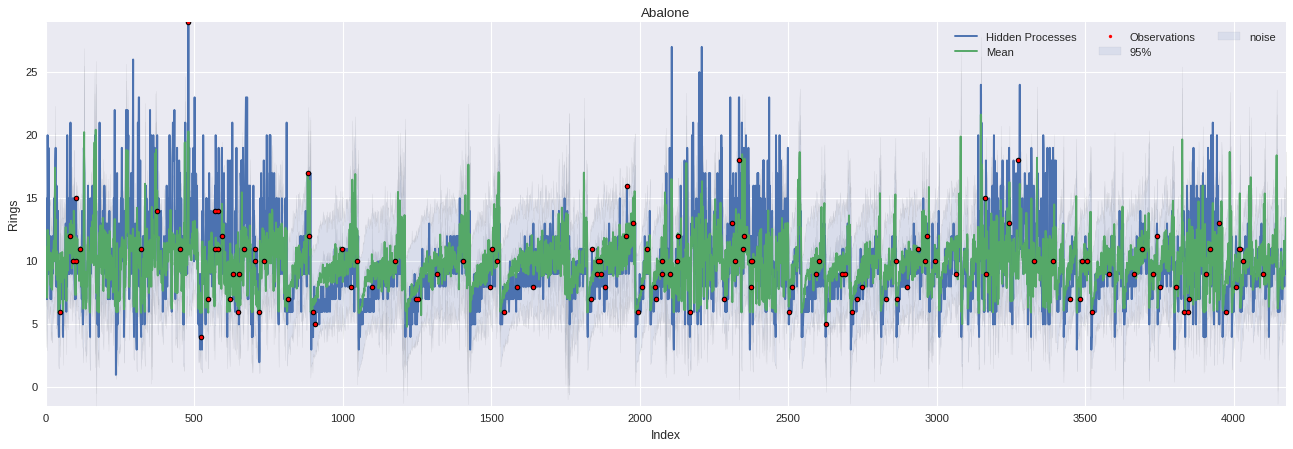

In [167]:
params = gp.find_MAP(points=4)
gp.plot(params)
print(params,'\n' ,gp.logp(params), gp.scores(params))

In [168]:
datatrace = gp.sample_hypers(start=params, samples=10000)
datatrace

Sampling 11 variables, 22 chains, 10000 times (None temps)


100%|██████████| 10000/10000 [03:52<00:00, 42.95it/s]


GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_rate_log___1  \
0                1.668284          -10.758487           -4.157897   
1                1.715938          -11.991314           -4.563042   
2                1.816819          -12.237386           -4.719610   
3                1.605032          -11.720789           -4.390916   
4                1.605032          -11.720789           -4.390916   
5                1.399777          -12.436741           -4.631349   
6                1.399777          -12.436741           -4.631349   
7                1.399777          -12.436741           -4.631349   
8                1.399777          -12.436741           -4.631349   
9                1.399777          -12.436741           -4.631349   
10               1.399777          -12.436741           -4.631349   
11               1.415549          -11.927705           -4.231552   
12               1.415549          -11.927705           -4.231552   
13               1.415549          -11.927705           -4.231552   
14               1.415549          -11.927705           -4.231552   
15               1.470317          -11.009696           -4.117582   
16               1.470317          -11.009696           -4.117582   
17               1.416469          -11.045179           -4.141463   
18               1.416469          -11.045179           -4.141463   
19               1.416469          -11.045179           -4.141463   
20               1.329606          -11.746884           -4.463775   
21               1.326511          -11.753940           -4.469782   
22               1.432513          -12.250582           -3.737751   
23               1.518748          -12.604189           -3.562459   
24               1.488786          -12.627118           -3.593313   
25               1.445351          -12.172670           -4.178454   
26               1.445351          -12.172670           -4.178454   
27               1.453588          -12.258849           -4.067492   
28               1.453588          -12.258849           -4.067492   
29               1.453588          -12.258849           -4.067492   
...                   ...                 ...                 ...   
219970           1.729929           -3.242256           -2.287016   
219971           1.729929           -3.242256           -2.287016   
219972           1.847124           -4.015346           -4.326396   
219973           1.847124           -4.015346           -4.326396   
219974           1.847124           -4.015346           -4.326396   
219975           1.847124           -4.015346           -4.326396   
219976           1.782302           -5.104162           -3.708543   
219977           1.787918           -4.485815           -3.191461   
219978           1.787918           -4.485815           -3.191461   
219979           1.787918           -4.485815           -3.191461   
219980           1.787918           -4.485815           -3.191461   
219981           1.787811           -4.492775           -3.189487   
219982           1.787811           -4.492775           -3.189487   
219983           1.787811           -4.492775           -3.189487   
219984           1.787811           -4.492775           -3.189487   
219985           1.787811           -4.492775           -3.189487   
219986           1.787811           -4.492775           -3.189487   
219987           1.787811           -4.492775           -3.189487   
219988           1.787811           -4.492775           -3.189487   
219989           1.787811           -4.492775           -3.189487   
219990           1.787811           -4.492775           -3.189487   
219991           1.788322           -3.008002           -1.203492   
219992           1.788322           -3.008002           -1.203492   
219993           1.788322           -3.008002           -1.203492   
219994           1.788322           -3.008002           -1.203492   
219995           1.788322           -3.008002           -1.203492   
219996

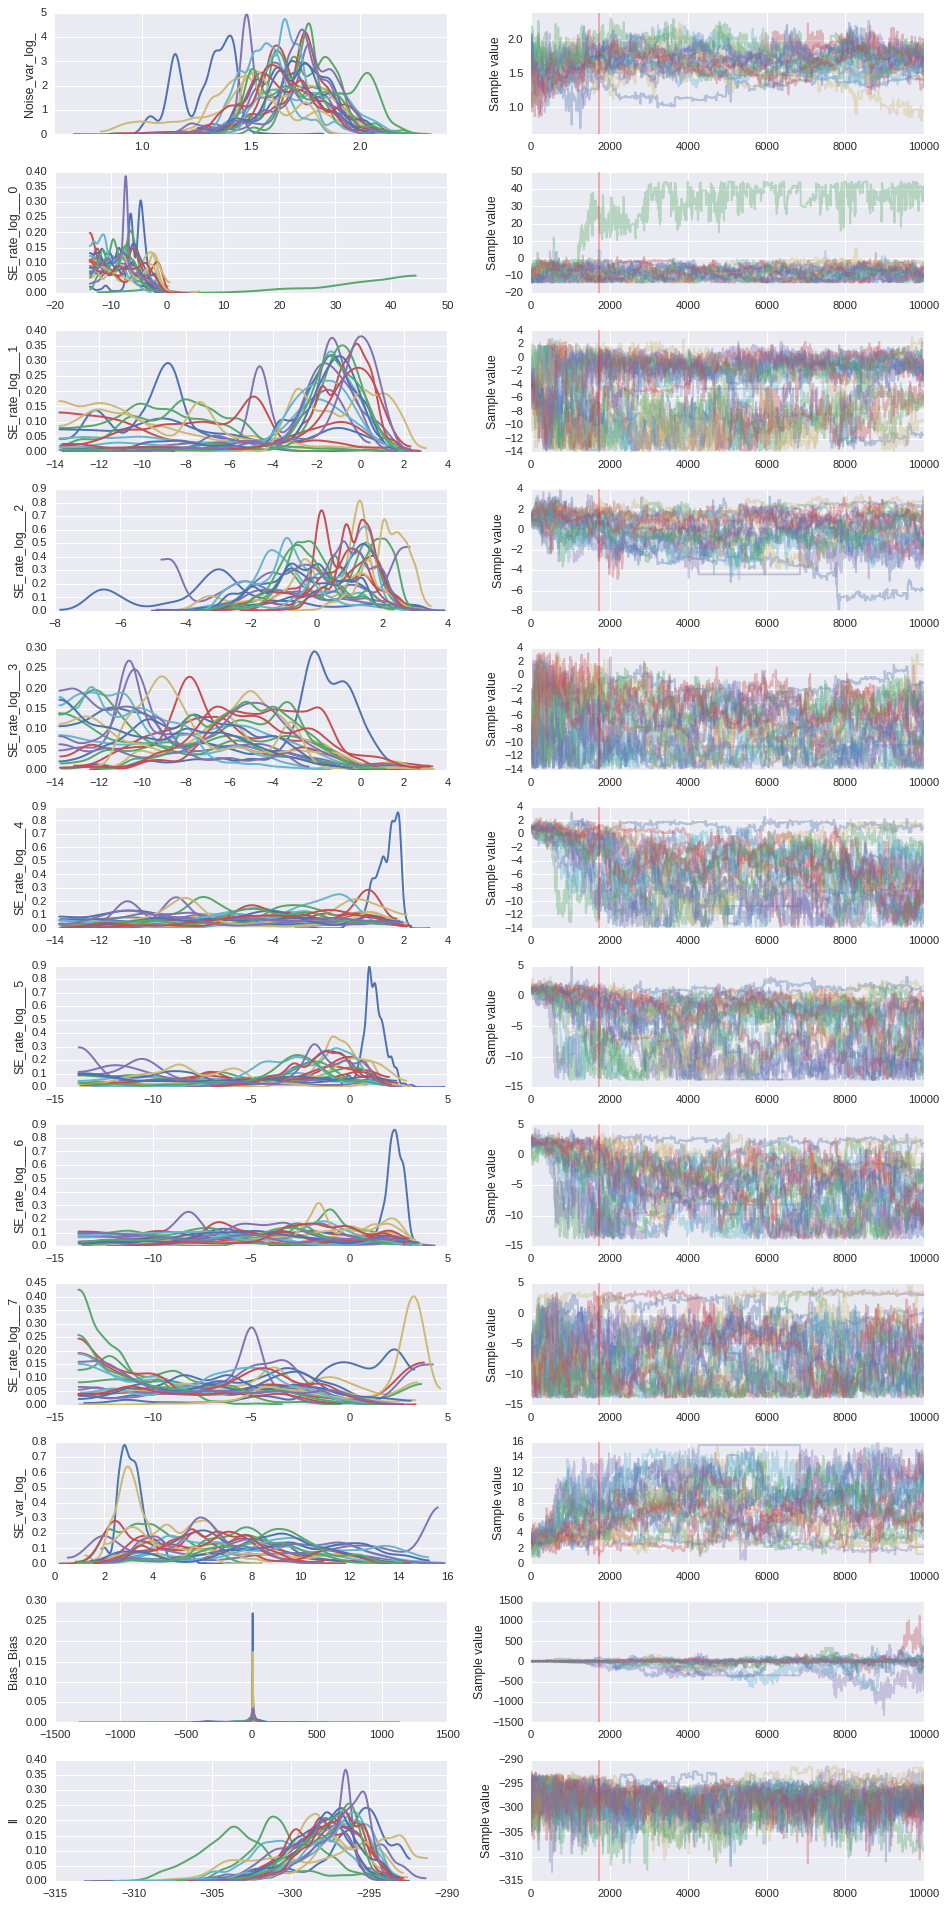

In [169]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

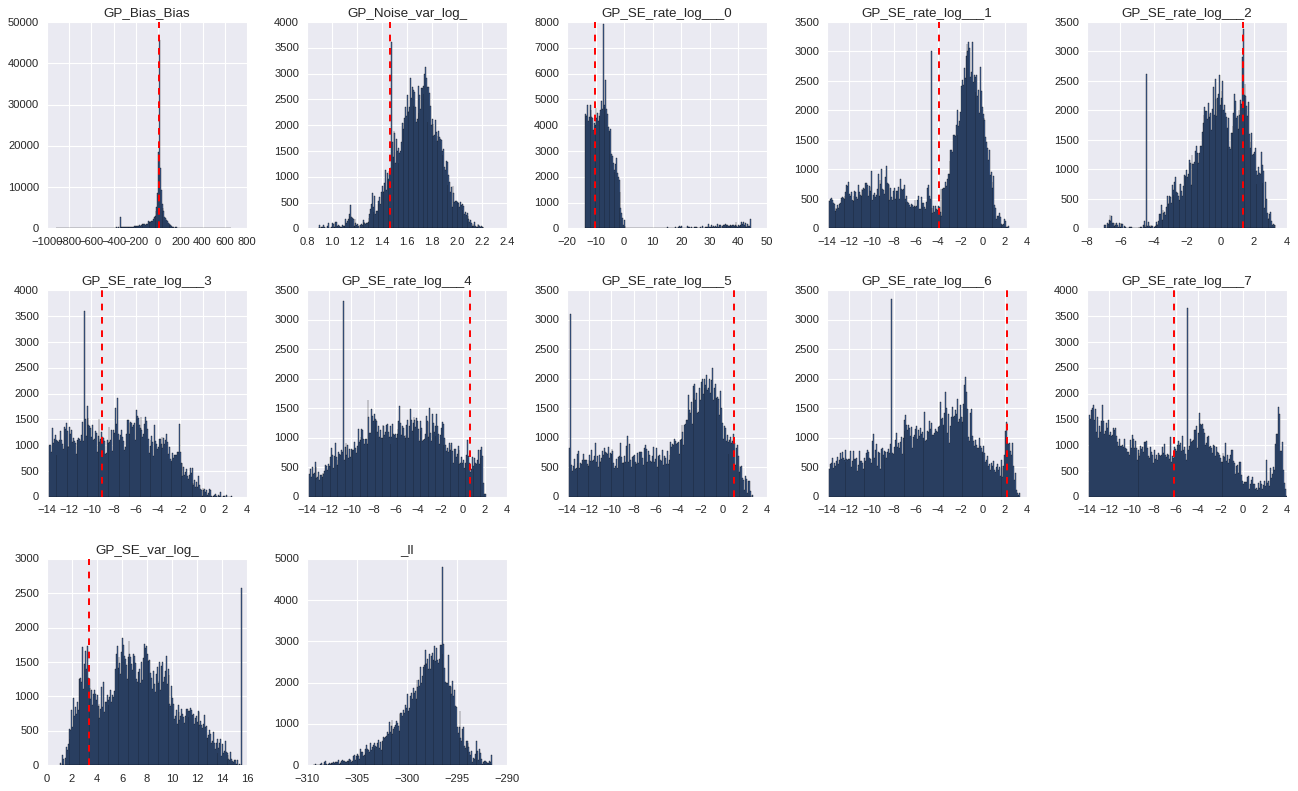

In [170]:
g3.hist_datatrace(datatrace, params=params)

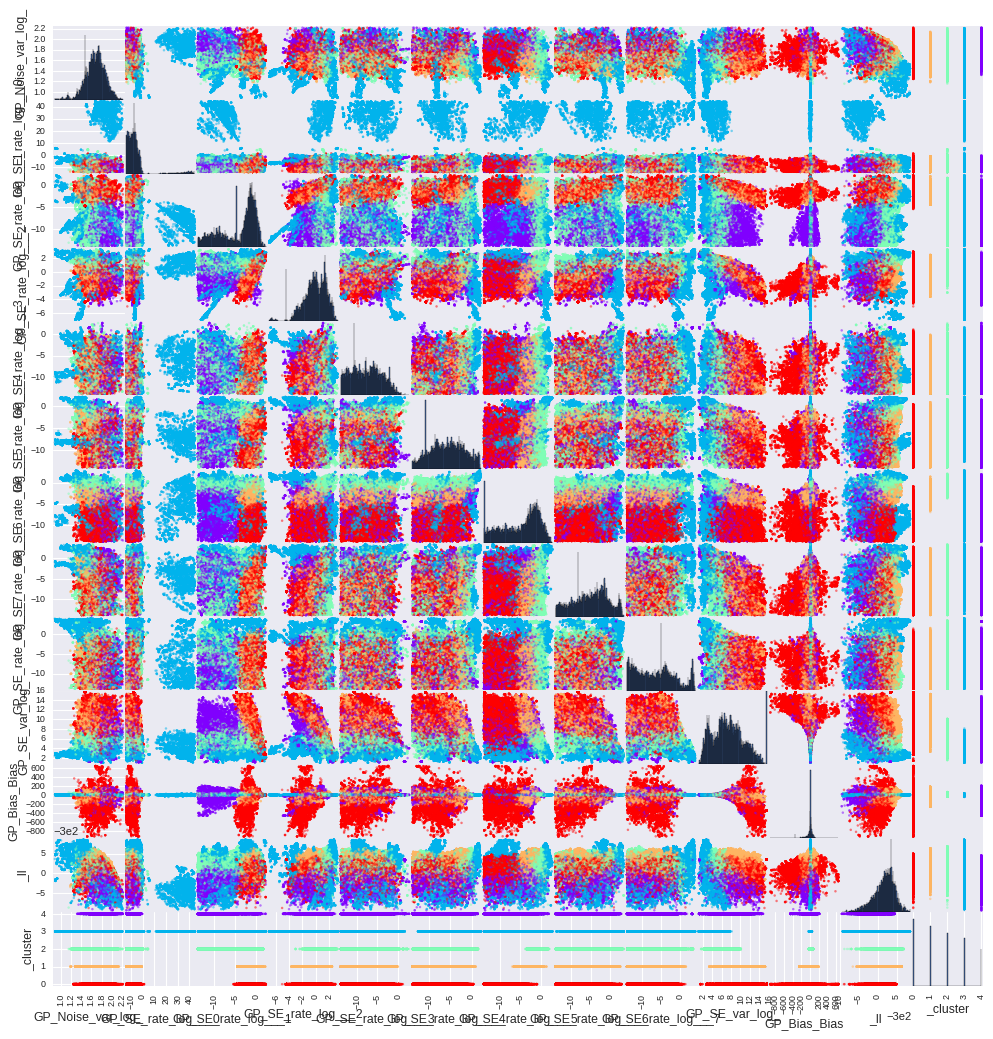

In [171]:
g3.cluster_datatrace(gp, datatrace)
g3.scatter_datatrace(datatrace)

In [172]:
candidates = g3.find_candidates(datatrace, ll=1, by_cluster=True)
candidates

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_rate_log___1  \
ll[167739]           1.383656           -5.035129           -2.499323   
ll[160001]           1.444823          -11.800749           -3.859564   
ll[170291]           1.521359          -11.183700           -0.264790   
ll[208922]           1.720715           -3.050735            0.691158   
ll[180405]           1.446977           -8.234086          -11.502342   

            GP_SE_rate_log___2  GP_SE_rate_log___3  GP_SE_rate_log___4  \
ll[167739]            2.295935           -8.674227           -7.718431   
ll[160001]            1.283865           -9.549746            0.694663   
ll[170291]            1.335420           -4.729952            0.026920   
ll[208922]            1.469244           -7.923530           -9.208503   
ll[180405]           -0.335392           -8.204133            0.860193   

            GP_SE_rate_log___5  GP_SE_rate_log___6  GP_SE_rate_log___7  \
ll[167739]           -7.240879           -1.852456            3.285746   
ll[160001]            1.064620            2.113153           -6.722611   
ll[170291]            0.892341            1.675070           -4.568588   
ll[208922]           -6.868866           -2.274196           -1.859339   
ll[180405]            1.427674            2.321754           -4.312691   

            GP_SE_var_log_  GP_Bias_Bias  _nchain  _niter  _burnin  _outlayer  \
ll[167739]        2.510782     11.519426       16    7739     True      False   
ll[160001]        3.393772     11.695256       16       1    False       True   
ll[170291]        3.829009      7.825280       17     291    False       True   
ll[208922]        5.121308     15.953226       20    8922     True       True   
ll[180405]        3.138569     13.927823       18     405    False       True   

                   _ll  _cluster  
ll[167739] -291.289276         3  
ll[160001] -292.479706         2  
ll[170291] -293.375519         1  
ll[208922] -295.034271         0  
ll[180405] -295.097229         4

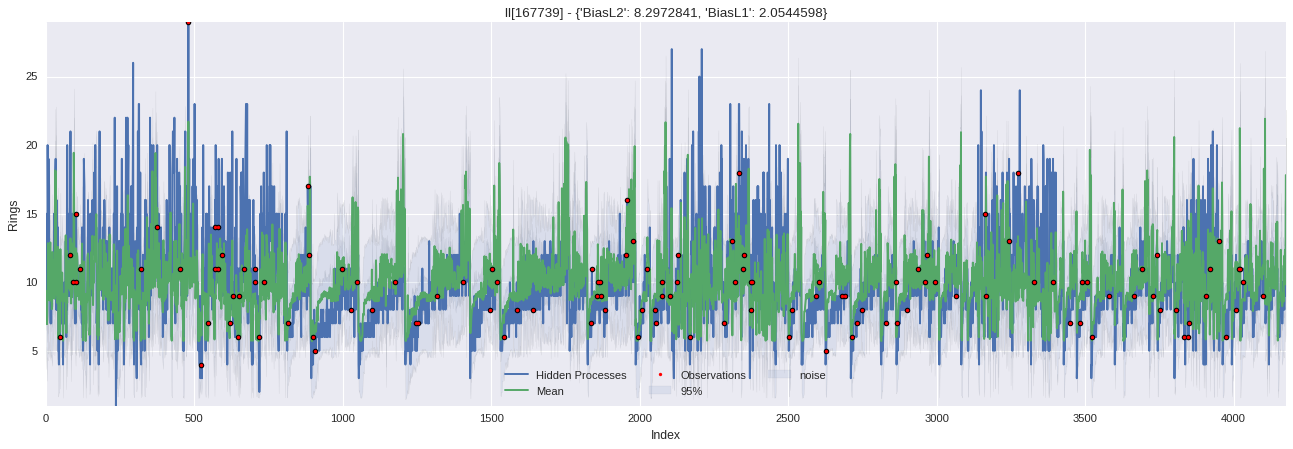

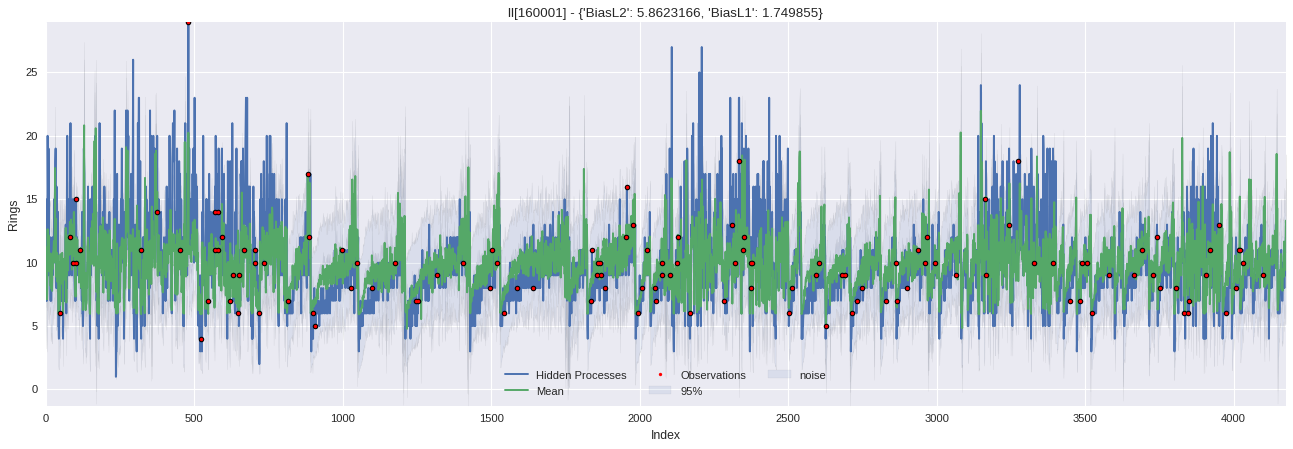

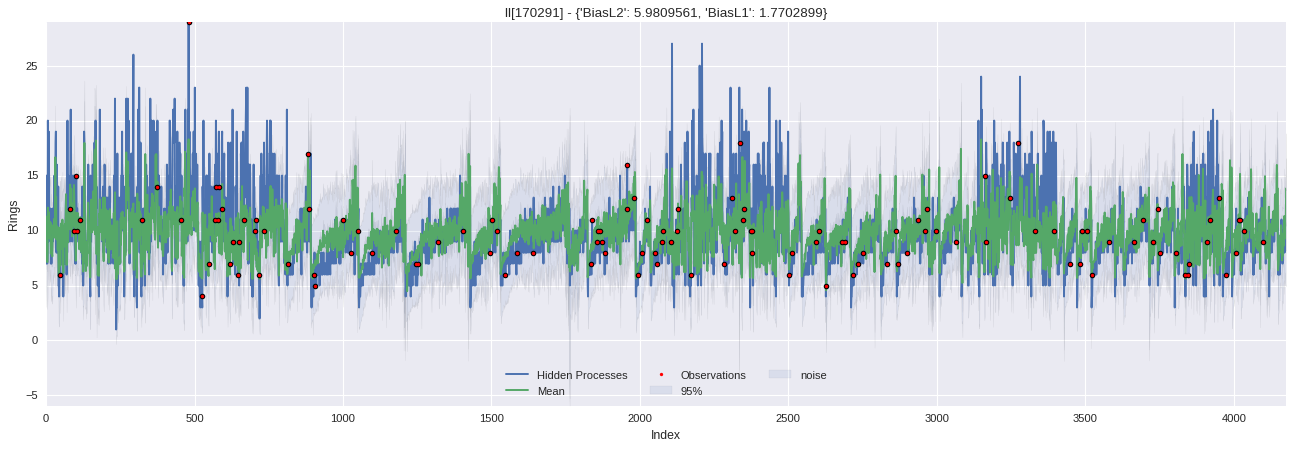

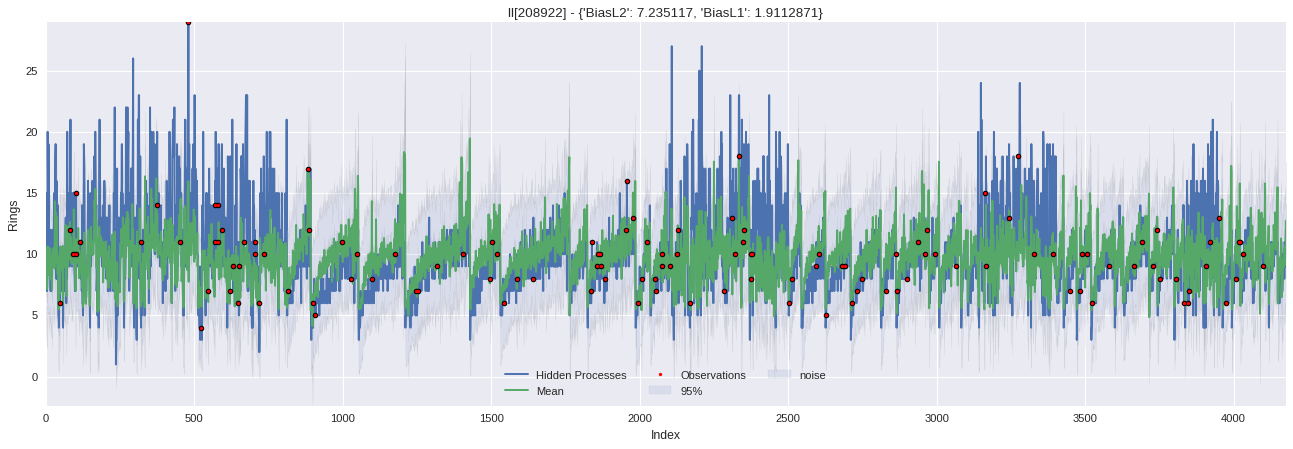

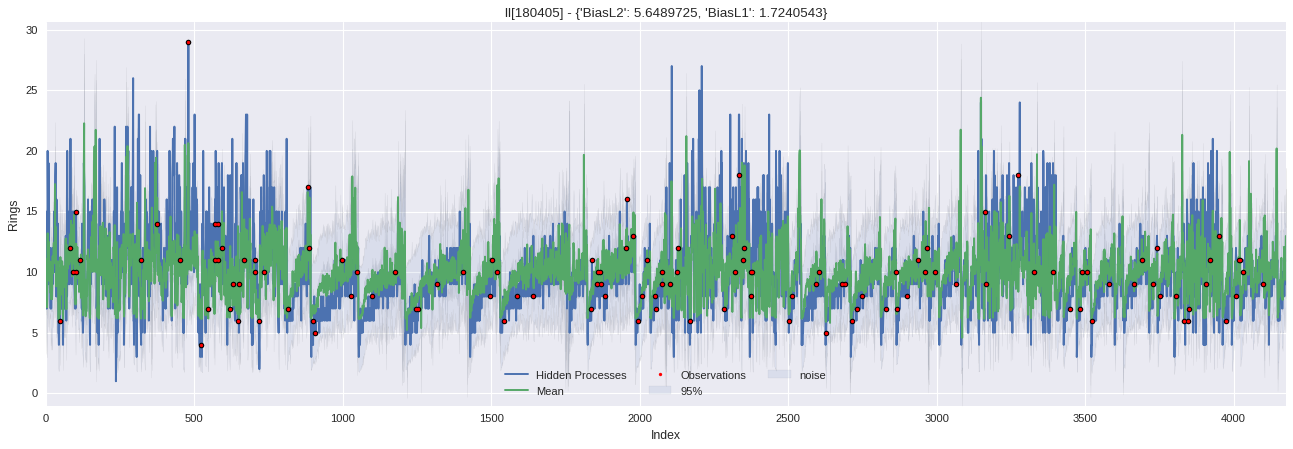

In [173]:
gp.plot_datatrace(candidates)

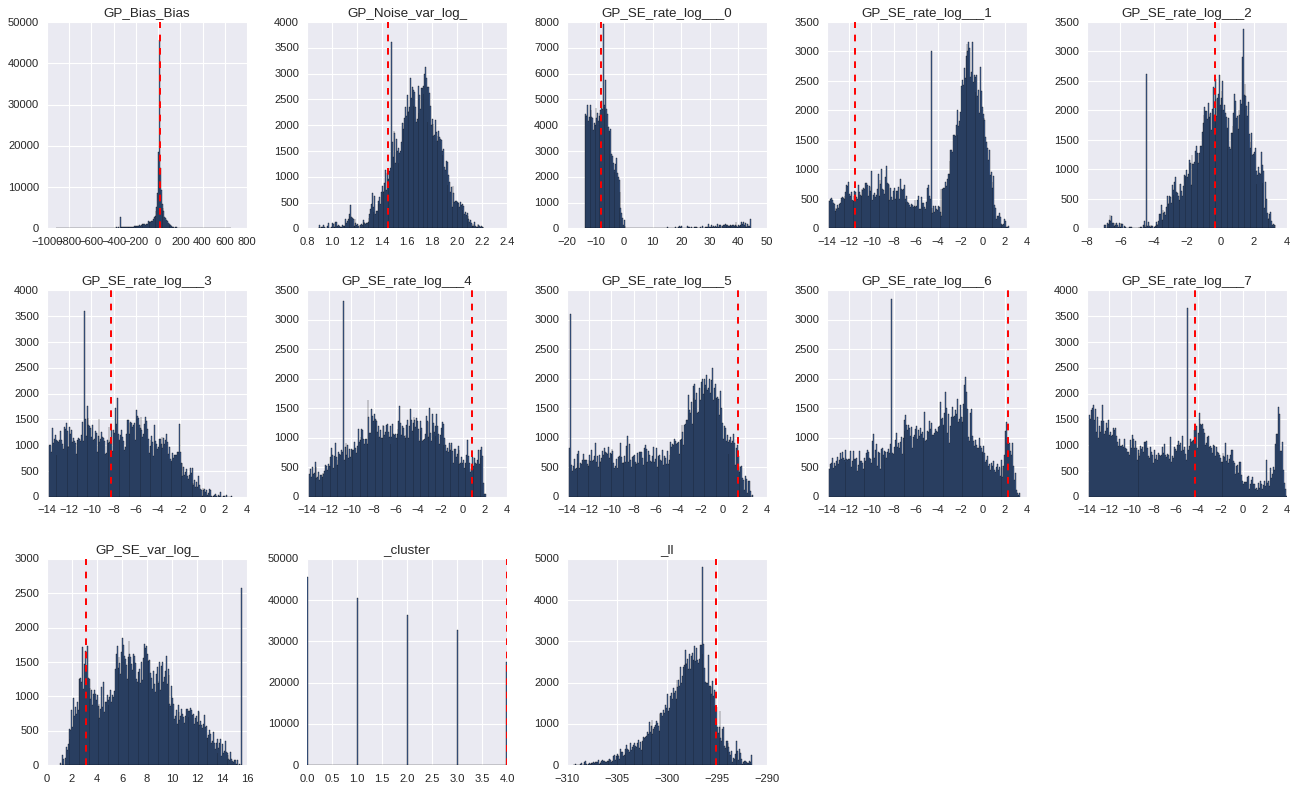

In [177]:
g3.hist_datatrace(datatrace, params=candidates.iloc[4])

Starting function value (-logp): 295.097

start_bfgs
         Current function value: 292.314270
         Iterations: 15
         Function evaluations: 97
         Gradient evaluations: 85

start_powell
Optimization terminated successfully.
         Current function value: 292.341858
         Iterations: 4
         Function evaluations: 679
{'BiasL2': 6.0592723, 'BiasL1': 1.766127}


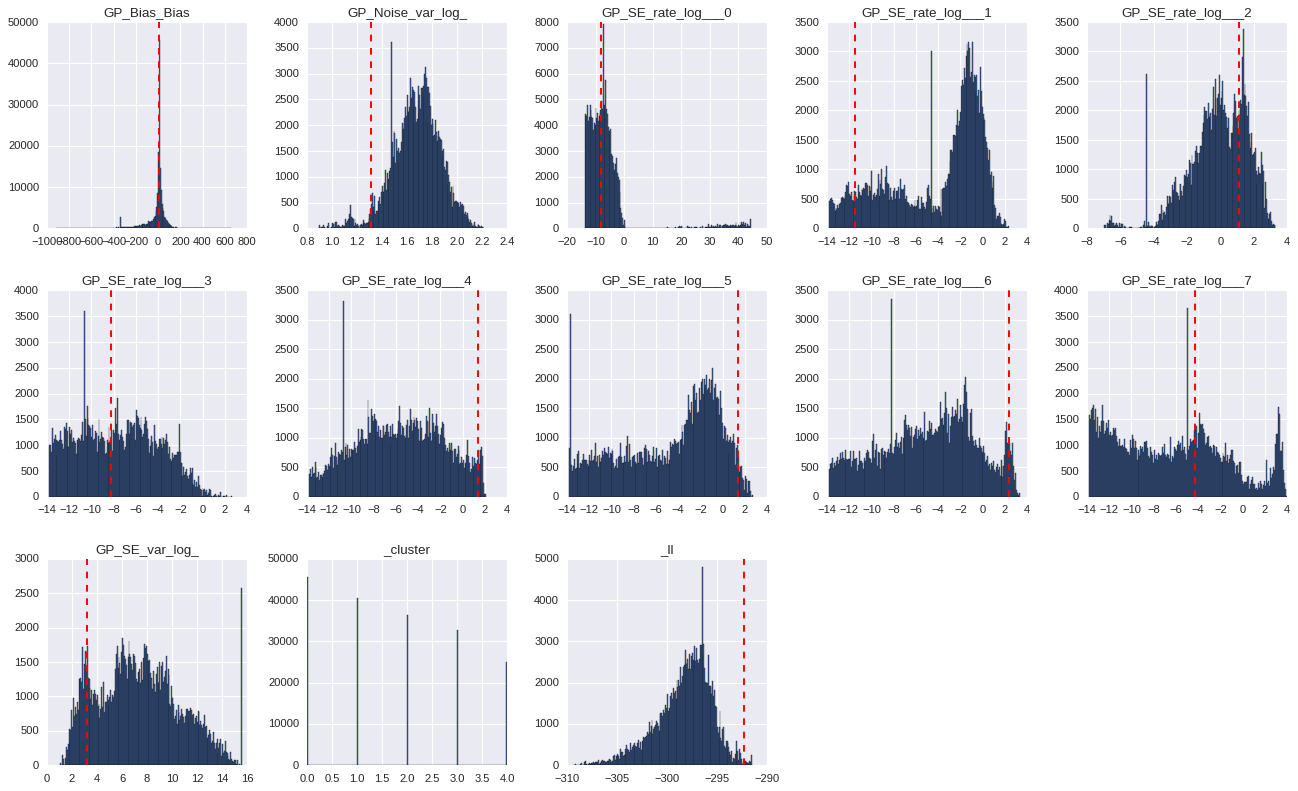

In [182]:
params = gp.find_MAP(gp.active.params_serie(candidates.iloc[4]), points=2)
print(gp.scores(params))
params['_ll'] = gp.logp(params)
g3.hist_datatrace(datatrace, params=params)